# Chapter 11: Non-parametric tests

### Sign Test

In [3]:
from scipy.stats import binomtest
import numpy as np
  # Customer satisfaction scores (before and after the new system)
old_system = [6, 7, 5, 8, 6, 7, 4, 9, 5, 6, 7, 8, 5, 6, 7, 8, 6, 5, 4, 7]
new_system = [8, 8, 6, 8, 7, 9, 5, 9, 6, 8, 8, 9, 6, 7, 8, 9, 6, 7, 5, 8]

# Convert to numpy arrays
old = np.array(old_system)
new = np.array(new_system)

# Calculate differences
diff = new - old

# Count positive and negative signs (exclude ties)
positive = np.sum(diff > 0)
negative = np.sum(diff < 0)
n = positive + negative

# Perform two-sided binomial test
result = binomtest(positive, n=n, p=0.5, alternative='two-sided')

# Print results
print(f"Positive signs: {positive}")
print(f"Negative signs: {negative}")
print(f"Ties: {np.sum(diff == 0)}")
print(f"P-value: {result.pvalue:.4f}")

Positive signs: 17
Negative signs: 0
Ties: 3
P-value: 0.0000


### Wilcoxon Rank-Sum Test (Mann-Whitney U Test)

Mann-Whitney U Statistic: 0.0000
P-value: 0.0001
Reject the null hypothesis: Diet B leads to significantly greater weight loss.


/var/folders/b8/hq7p21n142n321y966q8j1600000gn/T/ipykernel_6995/4039517031.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([diet_A, diet_B], labels=['Diet A', 'Diet B'])


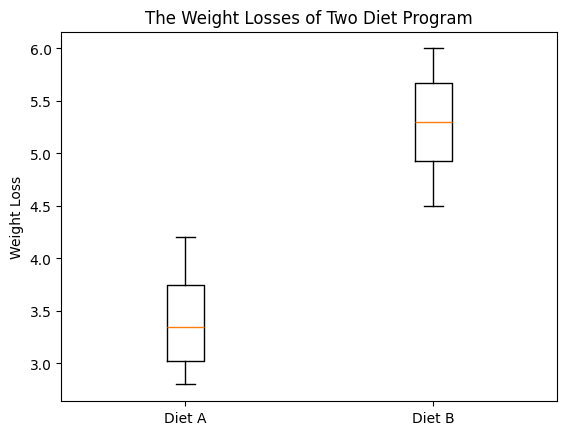

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Weight loss data (in kg) after 8 weeks
diet_A = [3.2, 2.8, 3.6, 4.1, 2.9, 3.5, 3.0, 4.2, 3.1, 3.8]
diet_B = [4.5, 5.1, 4.8, 6.0, 5.5, 5.7, 4.9, 5.8, 5.0, 5.6]

# Perform Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(diet_A, diet_B, alternative='less')

# Display the results
print(f'Mann-Whitney U Statistic: {stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Diet B leads to significantly greater weight loss.")
else:
    print("Fail to reject the null hypothesis: No significant difference in weight loss.")

plt.boxplot([diet_A, diet_B], labels=['Diet A', 'Diet B'])
plt.title('The Weight Losses of Two Diet Program')
plt.ylabel('Weight Loss')
plt.show()